## Intro to Machine Learning Course from Kaggle

https://www.kaggle.com/learn/intro-to-machine-learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10)

%matplotlib inline

In [2]:
# load data

melbourne_data = pd.read_csv('melb_data.csv')
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
# what is the average lot size
avg_lot_size = np.round(melbourne_data['Landsize'].mean(),decimals=0)
print('Avgerage lot size: ', avg_lot_size)
      
# how old is the newest home?
newest_home_age = 2021 - melbourne_data['YearBuilt'].max()
print('Age of newest home: ', newest_home_age)

# what is the most bedrooms?
most_bedrooms = melbourne_data['Bedroom2'].max()
print('Largest number of bedrooms: ', most_bedrooms)



Avgerage lot size:  471.0
Age of newest home:  3.0
Largest number of bedrooms:  9.0


In [8]:
# drop missing data to simplify things for now
melbourne_data = melbourne_data.dropna(axis=0)

In [30]:
# pull out the column we want to predict
y = melbourne_data.Price

In [32]:
# select features we want to use for our model
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = melbourne_data[melbourne_features]

In [33]:
y.describe()

count    6.196000e+03
mean     1.068828e+06
std      6.751564e+05
min      1.310000e+05
25%      6.200000e+05
50%      8.800000e+05
75%      1.325000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [34]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [36]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [19]:
X.dtypes

Rooms              int64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

In [39]:
# Build the model

# define the model. 
melbourne_model = DecisionTreeRegressor(random_state = 19)

# fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=19)

In [42]:
# make predictions for the first 10 houses

print('Making predictions for the first 5 houses:')
print(X.head())
print('The preditions are:')
print(melbourne_model.predict(X.head()))
print('The correct prices are:')
print(y.head())

Making predictions for the first 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The preditions are:
[1035000. 1465000. 1600000. 1876000. 1636000.]
The correct prices are:
1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


In [44]:
predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

In [47]:
# split data into training and validation data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 5)

# define model (again)
melbourne_model = DecisionTreeRegressor()

#fit model
melbourne_model.fit(train_X, train_y)

# get predited prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

266548.3795997418


In [51]:
# define a utility function to compare MAE scores based on different values of max_leaf_nodes

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 3)
    model.fit(train_X, train_y)
    preds_y = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_y)
    return(mae)

In [52]:
# loop through get_mae to evaluate 

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max Leaf Nodes: %d. \t\t MAE: %d" %(max_leaf_nodes,my_mae))

Max Leaf Nodes: 5. 		 MAE: 374305
Max Leaf Nodes: 50. 		 MAE: 272049
Max Leaf Nodes: 500. 		 MAE: 250342
Max Leaf Nodes: 5000. 		 MAE: 265871


In [54]:
# try a random forest

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melbourne_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melbourne_preds))

200337.92150573336


## Working with missing values

In [6]:
# load the data (again just in case)

data = pd.read_csv('melb_data.csv')

# select target
y = data.Price

# use only numerical predictors right now
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# set up training and validation data frames
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [7]:
# define a function to measure qulity of each approach

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators = 10, random_state = 0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return(mean_absolute_error(y_valid, preds))

In [8]:
# try one approach to deal with missing values
# drop columns with missing values

# get names of columsn with missing values
cols_with_missing = [col for col in X_train.columns
                    if X_train[col].isnull().any()]

# drop columsn in training and validation data sets
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1( drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1( drop columns with missing values):
183550.22137772635


In [14]:
# try a different approach - imputation

# imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (imputation):
178166.46269899711


In [16]:
# third approach - imputation while keeping track of changed values

# make a copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()
    
# imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# imputation removed column names, add them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 2 (imputation plus):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 2 (imputation plus):
178927.503183954


In [18]:
# check out the shapes
print(X_train.shape)

# number of missing vlues in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(10864, 12)
Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64


## Categorical Variables

In [22]:
# Read the data
data = pd.read_csv('melb_data.csv')

# Separate target from predictors
y = data.Price
X = data.drop(['Price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Drop columns with missing values (simplest approach)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] 
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

/Users/josh.fuchs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.8272,4217.0


In [24]:
# get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print('Categorical variables:')
print(object_cols)

Categorical variables:
['Type', 'Method', 'Regionname']


In [25]:
# Approach 1 - drop categorical variables
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print('MAE from Approach 1: Drop categorical variable:')
print(score_dataset(drop_X_train,drop_X_valid, y_train, y_valid))

MAE from Approach 1: Drop categorical variable:
183550.22137772635


In [27]:
# approach 2 - ordinal encoding

# make a copy to avoid changing original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

print('MAE from Approach 2: ordinal encoding:')
print(score_dataset(label_X_train,label_X_valid, y_train, y_valid))


MAE from Approach 2: ordinal encoding:
175062.2967599411


In [32]:
# approach 3 - one hot encoding

# apply one-hot encoder to each column with categorical data
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_cols_train = pd.DataFrame(oh_encoder.fit_transform(X_train[object_cols]))
oh_cols_valid = pd.DataFrame(oh_encoder.transform(X_valid[object_cols]))

# one hot encoding removed the index, put it back
oh_cols_train.index = X_train.index
oh_cols_valid.index = X_valid.index

# remove cetegorial colums (will replace with oh encoding)
num_X_train = X_train.drop(object_cols, axis = 1)
num_X_valid = X_valid.drop(object_cols, axis = 1)

# add oh encoded columns to numerical features
oh_X_train = pd.concat([num_X_train, oh_cols_train], axis = 1)
oh_X_valid = pd.concat([num_X_valid, oh_cols_valid], axis = 1)

print('MAE from Approach 3: one-hot encoding:')
print(score_dataset(oh_X_train,oh_X_valid, y_train, y_valid))

MAE from Approach 3: one-hot encoding:
176703.63810751104


## pipelines

In [4]:
# Read the data
data = pd.read_csv('melb_data.csv')

# Separate target from predictors
y = data.Price
X = data.drop(['Price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


In [5]:
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


In [12]:
# preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# preprocessing for categorical data
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [8]:
# define random forest model

model = RandomForestRegressor(n_estimators= 100, random_state = 0)

In [13]:
# bundle preprocessing and moedling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# preprocessing of training data, fit mode
my_pipeline.fit(X_train, y_train)

# preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 161879.65212497368


## Cross-Validation

In [2]:
# load the data again, to re-label the variables
# Read the data
data = pd.read_csv('melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

In [3]:
# set up a pipeline

my_pipeline = Pipeline(steps = [('preprocessor', SimpleImputer()),
                               ('model', RandomForestRegressor(n_estimators=50, random_state=2))])

In [5]:
# multiply by -1 since sklearn calculate *negative* MAE

scores = -1 * cross_val_score(my_pipeline, X, y,
                             cv = 5,
                             scoring = 'neg_mean_absolute_error')

print('MAE scores:\n', scores)

MAE scores:
 [302627.96605968 298454.38492554 285229.78880211 233619.62516121
 259121.6698053 ]


In [6]:
print('Average MAE score:', scores.mean())

Average MAE score: 275810.6869507666


In [7]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps = [('preprocessor', SimpleImputer()),
                                   ('model', RandomForestRegressor(n_estimators = n_estimators, random_state=0))])
    
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv = 3,
                                  scoring = 'neg_mean_absolute_error')
    return(scores.mean())

In [11]:
results = {}
for i in range(7,17):
    results[50*i] = get_score(50*i)

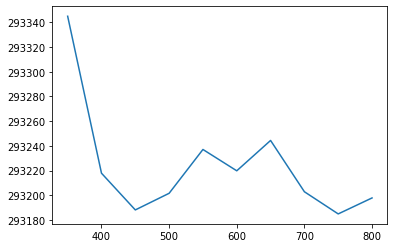

In [12]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

## XG Boost

In [2]:
# reload the data for fun

# Read the data
data = pd.read_csv('melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [13]:
my_model = XGBRegressor(n_estimators = 500, learning_rate = 0.05, n_jobs = 2)
my_model.fit(X_train, y_train,
             early_stopping_rounds = 5,
             eval_set = [(X_valid, y_valid)],
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
predictions = my_model.predict(X_valid)
print('MAE: ' + str(mean_absolute_error(predictions, y_valid)))

MAE: 243242.6186763623


# Clustering with K Means

In [13]:
df = pd.read_csv('melb_data.csv')
# drop missing data to simplify things for now
#df = df.dropna(axis=0, inplace=True)

Q = df.loc[:, ['Price', 'Lattitude', 'Longtitude']]
Q.head()

,Price,Lattitude,Longtitude
0,1480000.0,-37.7996,144.9984
1,1035000.0,-37.8079,144.9934
2,1465000.0,-37.8093,144.9944
3,850000.0,-37.7969,144.9969
4,1600000.0,-37.8072,144.9941


In [14]:
# create cluster feature
kmeans = KMeans(n_clusters=6)
Q['cluster'] = kmeans.fit_predict(Q)
Q['cluster'] = Q['cluster'].astype('category')

Q.head()

,Price,Lattitude,Longtitude,cluster
0,1480000.0,-37.7996,144.9984,3
1,1035000.0,-37.8079,144.9934,0
2,1465000.0,-37.8093,144.9944,3
3,850000.0,-37.7969,144.9969,0
4,1600000.0,-37.8072,144.9941,1


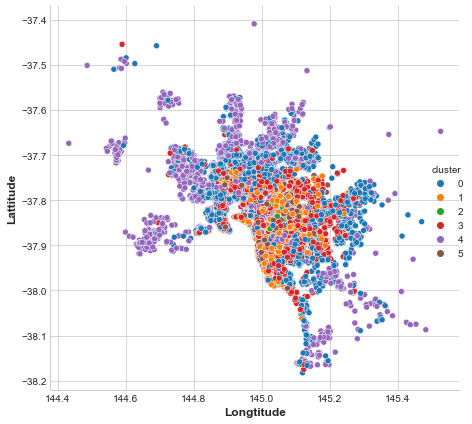

In [15]:
sns.relplot(x='Longtitude', y = 'Lattitude', hue='cluster', data=Q, height = 6)

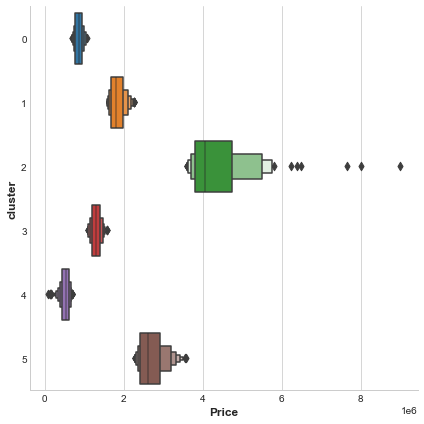

In [16]:
sns.catplot(x='Price', y='cluster', data=Q, kind='boxen', height=6)

# Try with some other parameters

In [18]:
df = pd.read_csv('melb_data.csv')
df.columns()

TypeError: 'Index' object is not callable